<a href="https://colab.research.google.com/github/whiteydoublee/Colab/blob/main/Ch3.%EB%94%A5%EB%9F%AC%EB%8B%9D/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜: 2021/10/27
이름: 김예은
내용: 딥러닝 CNN 실습하기
"""
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
#데이터불러오기
(cifar_train_data,cifar_train_label),(cifar_test_data, cifar_test_label) = load_data()
cifar_train_data.shape

(50000, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


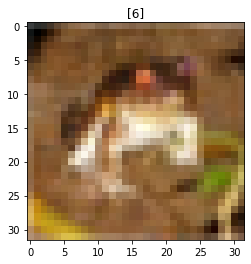

In [3]:
#데이터 확인
plt.title(cifar_train_label[0])
plt.imshow(cifar_train_data[0])
plt.show()

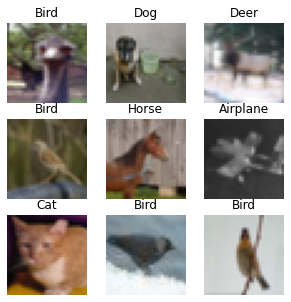

In [4]:
#데이터 샘플 확인
label_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Sheep']
random_idx=np.random.randint(50000, size=9)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  label= cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx,:])
  plt.title(label_names[label])
  plt.axis('off')

In [5]:
#학습데이터, 라벨(원-핫 인코딩)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [6]:
#학습모델
model = Sequential()

#CNN층
model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))

#FCNN층(일반 딥러닝 입력층,은닉층, 출력층)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [7]:
#모델설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
# 학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 20s 9ms/step - loss: 1.2904 - acc: 0.5420
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9285 - acc: 0.6740
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7630 - acc: 0.7319
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6291 - acc: 0.7770
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5041 - acc: 0.8210
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3951 - acc: 0.8601
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3019 - acc: 0.8924
Epoch 8/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2396 - acc: 0.9162
Epoch 9/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1913 - acc: 0.9326
Epoch 10/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1641 - acc: 0.9424
Epoch 11/20
1563/15

In [9]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 2s 5ms/step - loss: 2.0106 - acc: 0.6905


[2.01063871383667, 0.690500020980835]

In [10]:
#모델저장
model.save('/content/drive/MyDrive/Colab Notebooks/Model/cifar10.h5')